# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
    1. [Dropping Data](#Dropping-Data)
    2. [Derived Data](#Derived-Data)
5. [Analisis de Datos](#Analisis-de-Datos)
    1. [Analisis-Univariable](#Analisis-Univariable)
        1. [Plot Numeric Data](#Plot-Numeric-Data)
        2. [Plot Categorical Data](#Plot-Categorical-Data)
    2. [Analisis-Bivariable](#Analisis-Bivariable)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
    1. [Splitting data into Train Test](#Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#Model-Building)
    1. [Ridge Regression](#Ridge-Regression)
    2. [Lasso Regression](#Lasso-Regression)
    3. [ElasticNet Regression](#ElasticNet-Regression)
8. [Conclusiones y Observaciones](#Conclusiones-y-Observaciones)

# Introduccion 

### Integrates de Grupo:
* Sergio Godoy (sergio-godoy@hotmail.com)
* Rodrigo Mercado (rodrirafamercado1504@gmail.com)

## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.
 
### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# Configuracion e Instalacion

# Entendimiento de los Datos

In [2]:
# ============================================================
# IMPORTACIÓN DE LIBRERÍAS
# ============================================================
# En esta sección se importan las librerías necesarias para:
# - Manipulación y análisis de datos
# - Visualización
# - Modelado estadístico y de machine learning
# - Evaluación de modelos y selección de variables

# ------------------------------
# Librerías generales y utilitarias
# ------------------------------
import os                     # Manejo de rutas y archivos
import json                   # Lectura/escritura de archivos en formato JSON
import math                   # Funciones matemáticas básicas
import numpy as np             # Cálculo numérico y manejo de arreglos
import pandas as pd            # Manipulación y análisis de datos en formato tabular
import matplotlib.pyplot as plt  # Gráficos y visualizaciones básicas

# ------------------------------
# Warnings
# ------------------------------
import warnings
# Silencia únicamente el warning "Found unknown categories ..." de sklearn
warnings.filterwarnings(
    "ignore",
    message="Found unknown categories",
    category=UserWarning,
    module=r"sklearn\.preprocessing\._encoders"
)


# Configuración de pandas para visualizar más columnas
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 160)

# ------------------------------
# Librerías de Machine Learning (scikit-learn)
# ------------------------------
from sklearn.model_selection import train_test_split, GridSearchCV  # División de datos y búsqueda de hiperparámetros
from sklearn.compose import ColumnTransformer                       # Transformaciones de columnas (numéricas/categóricas)
from sklearn.preprocessing import OneHotEncoder, StandardScaler      # Codificación de variables y escalado
from sklearn.impute import SimpleImputer                             # Imputación de valores faltantes
from sklearn.pipeline import Pipeline                                # Construcción de pipelines
from sklearn.linear_model import (                                   # Modelos lineales:
    LinearRegression,                                                #   - Regresión lineal simple
    Ridge,                                                           #   - Ridge (L2)
    Lasso,                                                           #   - Lasso (L1)
    ElasticNet                                                       #   - ElasticNet (combinación L1/L2)
)
from sklearn.metrics import r2_score, mean_squared_error              # Métricas de desempeño de modelos
from sklearn.feature_selection import RFE                            # Eliminación recursiva de características (RFE)

# ------------------------------
# Librerías estadísticas (Statsmodels)
# ------------------------------
import statsmodels.api as sm                                         # Modelado estadístico y OLS (Ordinary Least Squares)
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Cálculo del VIF (colinealidad)

# ------------------------------
# Configuración adicional
# ------------------------------
# Semilla para reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Ruta del dataset (ajustar si es necesario)
DATA_PATH = "data/dataset.csv"
assert os.path.exists(DATA_PATH), f"No se encontró el archivo en {DATA_PATH}"

# Función auxiliar de RMSE
def rmse(y_true, y_pred) -> float:
    """Calcula el Root Mean Squared Error (RMSE)."""
    return mean_squared_error(y_true, y_pred, squared=False)

print("✅ Librerías importadas correctamente.")


✅ Librerías importadas correctamente.


In [4]:
# ============================================================
# CARGA DE DATOS
# ============================================================
# En esta sección se carga el dataset desde su ubicación.
# El archivo contiene información de propiedades (precios, características, etc.).
# Antes de cualquier análisis, se revisan las dimensiones y las primeras filas.

# Cargar el dataset (asegúrate de que la ruta DATA_PATH esté correcta)
df = pd.read_csv(DATA_PATH)

# Mostrar las dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")

# Vista preliminar de las primeras observaciones
display(df.head(5))

# Información general del DataFrame (tipos de datos y conteo de no nulos)
print("\nResumen de información del dataset:")
print(df.info())


Dimensiones del dataset: 1460 filas y 81 columnas


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Resumen de información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    

# Manipulacion y Limpieza de Datos

# Dropping Data

In [5]:
# ============================================================
# DROPPING DATA
# ============================================================
# Objetivo:
# - Asegurar que el target exista y no tenga nulos
# - Remover duplicados
# - Estandarizar textos y normalizar "NA"/"" -> NaN
# - Opcional: descartar columnas con demasiados nulos
# - Imputar valores faltantes (numéricas por mediana, categóricas por moda)
# Salida:
# - df_clean (dataset limpio)
# - X, y, num_cols, cat_cols actualizados

# --- 4.A.1 Asegurar target y remover filas con target nulo ---
TARGET = "SalePrice"
assert TARGET in df.columns, f"No se encontró la columna objetivo '{TARGET}'."

df_work = df.copy()
n_target_null = df_work[TARGET].isna().sum()
if n_target_null > 0:
    print(f"⚠️ {n_target_null} filas con {TARGET}=NaN -> se eliminan.")
    df_work = df_work[~df_work[TARGET].isna()].reset_index(drop=True)

# --- 4.A.2 Remover duplicados exactos ---
n_dup = df_work.duplicated().sum()
print(f"Duplicados detectados: {n_dup}")
if n_dup > 0:
    df_work = df_work.drop_duplicates().reset_index(drop=True)
    print("✅ Duplicados eliminados.")

# --- 4.A.3 Estandarizar strings y normalizar marcadores de vacío ---
obj_cols_all = df_work.select_dtypes(include=["object"]).columns.tolist()
for c in obj_cols_all:
    # convertir a string y recortar espacios
    df_work[c] = df_work[c].astype(str).str.strip()
    # normalizar a NaN tokens comunes
    df_work[c] = df_work[c].replace({"": np.nan, "NA": np.nan, "NaN": np.nan, "None": np.nan, "nan": np.nan})

# --- 4.A.4 (Opcional) Dropping de columnas con demasiados nulos ---
# Si alguna columna tiene > 60% de nulos y no es clave, puedes descartarla.
max_null_frac = 0.60
null_frac = df_work.isna().mean().sort_values(ascending=False)
cols_drop = [c for c, f in null_frac.items() if f > max_null_frac and c != TARGET]
if cols_drop:
    print(f"🗑️ Columnas descartadas (> {int(max_null_frac*100)}% nulos): {cols_drop}")
    df_work = df_work.drop(columns=cols_drop)

# --- 4.A.5 Definir listas de columnas por tipo (tras drops) ---
num_cols = df_work.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df_work.select_dtypes(include=["object", "category"]).columns.tolist()
# Asegurar que el target no esté en num_cols (lo quitamos luego)
if TARGET in num_cols:
    num_cols = [c for c in num_cols if c != TARGET]

# --- 4.A.6 Imputación de faltantes (versión moderna, sin inplace) ---
df_clean = df_work.copy()

# Numéricas -> mediana
for col in num_cols:
    if df_clean[col].isna().sum() > 0:
        med = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(med)
        print(f"Imputada mediana en: {col}")

# Categóricas -> moda
for col in cat_cols:
    if df_clean[col].isna().sum() > 0:
        mode_val = df_clean[col].mode(dropna=True)
        if len(mode_val) > 0:
            df_clean[col] = df_clean[col].fillna(mode_val.iloc[0])
            print(f"Imputada moda en: {col}")

# --- 4.A.7 Verificación final y actualización de X/y ---
restantes = df_clean.isna().sum()
restantes = restantes[restantes > 0]
if len(restantes) == 0:
    print("✅ No quedan valores faltantes.")
else:
    print("⚠️ Aún quedan faltantes en:")
    display(restantes)

print(f"Shape limpio: {df_clean.shape}")

X = df_clean.drop(columns=[TARGET])
y = df_clean[TARGET].astype(float)  # aseguramos tipo numérico del target

# Recalcular tipos sobre X (por si el drop cambió algo)
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

print(f"Numéricas: {len(num_cols)} | Categóricas: {len(cat_cols)}")



Duplicados detectados: 0
🗑️ Columnas descartadas (> 60% nulos): ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
Imputada mediana en: LotFrontage
Imputada mediana en: MasVnrArea
Imputada mediana en: GarageYrBlt
Imputada moda en: MasVnrType
Imputada moda en: BsmtQual
Imputada moda en: BsmtCond
Imputada moda en: BsmtExposure
Imputada moda en: BsmtFinType1
Imputada moda en: BsmtFinType2
Imputada moda en: Electrical
Imputada moda en: FireplaceQu
Imputada moda en: GarageType
Imputada moda en: GarageFinish
Imputada moda en: GarageQual
Imputada moda en: GarageCond
✅ No quedan valores faltantes.
Shape limpio: (1460, 77)
Numéricas: 37 | Categóricas: 39


# Derived Data

In [6]:
# ============================================================
# DERIVED DATA (FEATURE ENGINEERING SEGURO)
# ============================================================
# Objetivo:
# - Crear variables derivadas de uso frecuente en housing.
# - Implementación "segura": solo se crean si las columnas requeridas existen.
# - No rompe el flujo si faltan columnas específicas.

def add_feature_if_cols_exist(data: pd.DataFrame, new_col: str, required: list, fn) -> bool:
    """Crea la columna new_col si todas las columnas de 'required' existen."""
    if all(col in data.columns for col in required):
        data[new_col] = fn(data[required])
        return True
    return False

# --- 4.B.1 Derivadas típicas (se crean si las columnas existen) ---
created = []

# Total de baños (cuenta medios baños como 0.5)
if add_feature_if_cols_exist(
    df_clean, "Bathrooms_Total",
    ["FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"],
    lambda d: d["FullBath"] + 0.5*d["HalfBath"] + d["BsmtFullBath"] + 0.5*d["BsmtHalfBath"]
):
    created.append("Bathrooms_Total")

# Superficie total aproximada (habitable + sótano + garaje)
if add_feature_if_cols_exist(
    df_clean, "Total_Area_SF",
    ["GrLivArea", "TotalBsmtSF", "GarageArea"],
    lambda d: d["GrLivArea"] + d["TotalBsmtSF"] + d["GarageArea"]
):
    created.append("Total_Area_SF")

# Indicador de remodelación
if add_feature_if_cols_exist(
    df_clean, "Is_Remodeled",
    ["YearRemodAdd", "YearBuilt"],
    lambda d: (d["YearRemodAdd"] > d["YearBuilt"]).astype(int)
):
    created.append("Is_Remodeled")

# Edad de la casa al momento de la venta
if add_feature_if_cols_exist(
    df_clean, "House_Age",
    ["YrSold", "YearBuilt"],
    lambda d: d["YrSold"] - d["YearBuilt"]
):
    created.append("House_Age")

print(f"✅ Columnas derivadas creadas: {created if created else 'ninguna (no aplicaban)'}")

# --- 4.B.2 Actualizar X, num_cols, cat_cols tras derivadas ---
X = df_clean.drop(columns=[TARGET])
y = df_clean[TARGET].astype(float)

num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
print(f"Numéricas: {len(num_cols)} | Categóricas: {len(cat_cols)}")



✅ Columnas derivadas creadas: ['Bathrooms_Total', 'Total_Area_SF', 'Is_Remodeled', 'House_Age']
Numéricas: 40 | Categóricas: 39


# Analisis de Datos

# Analisis-Univariable

# Plot Numeric Data

Total de variables numéricas: 40


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.50,421.61,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,69.86,22.03,21.0,60.00,69.0,79.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.12,180.73,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0


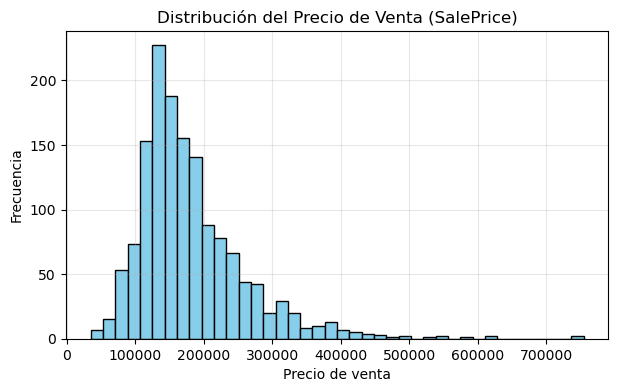

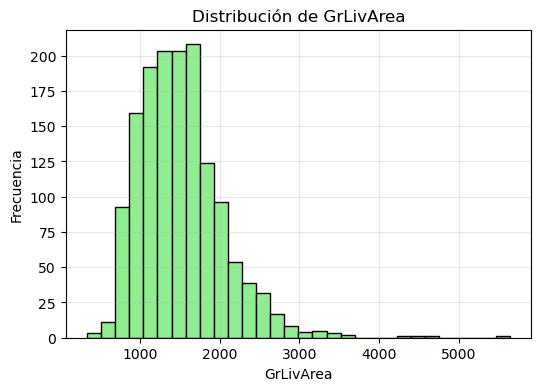

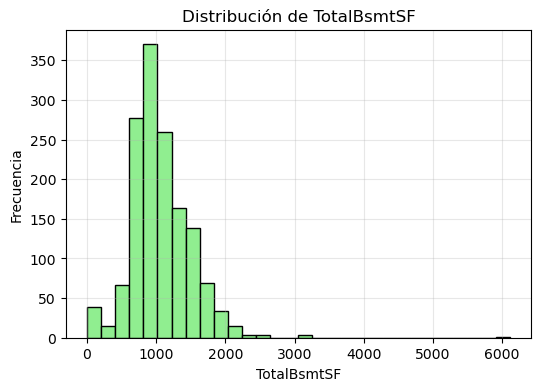

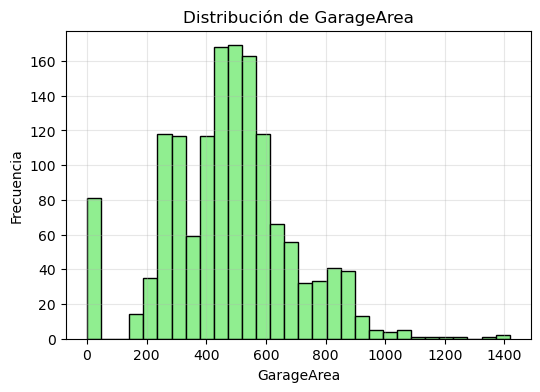

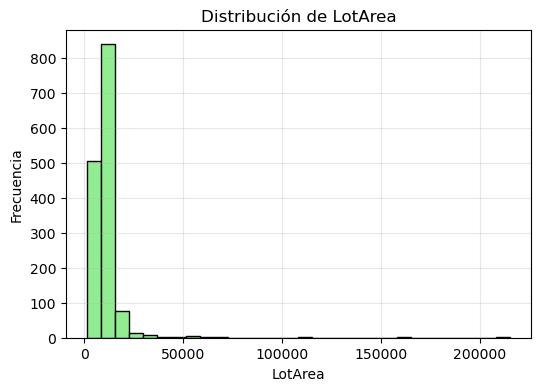

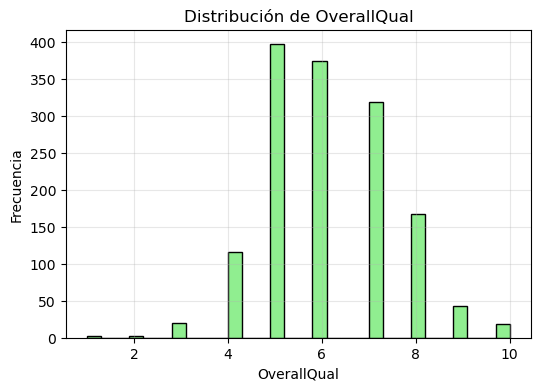

In [7]:
# ============================================================
# 5.A.a ANÁLISIS UNIVARIADO - PLOT NUMERIC DATA
# ============================================================
# Objetivo:
# - Visualizar la distribución de las variables numéricas.
# - Analizar el comportamiento de la variable objetivo (SalePrice).
# - Detectar asimetrías o valores atípicos en los predictores.

# Cantidad de variables numéricas
print(f"Total de variables numéricas: {len(num_cols)}")

# Estadísticas descriptivas
display(df_clean[num_cols].describe().T.round(2))

# Distribución del target (SalePrice)
plt.figure(figsize=(7, 4))
plt.hist(df_clean[TARGET], bins=40, color="skyblue", edgecolor="black")
plt.title("Distribución del Precio de Venta (SalePrice)")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()

# Comentario:
# La variable SalePrice suele presentar asimetría positiva (cola a la derecha),
# por lo que en pasos posteriores podríamos aplicar una transformación logarítmica.

# Histogramas de algunas variables numéricas clave
numeric_features_to_plot = ["GrLivArea", "TotalBsmtSF", "GarageArea", "LotArea", "OverallQual"]

for feature in numeric_features_to_plot:
    if feature in df_clean.columns:
        plt.figure(figsize=(6, 4))
        plt.hist(df_clean[feature], bins=30, color="lightgreen", edgecolor="black")
        plt.title(f"Distribución de {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frecuencia")
        plt.grid(alpha=0.3)
        plt.show()


# Plot Categorical Data

Total de variables categóricas: 39


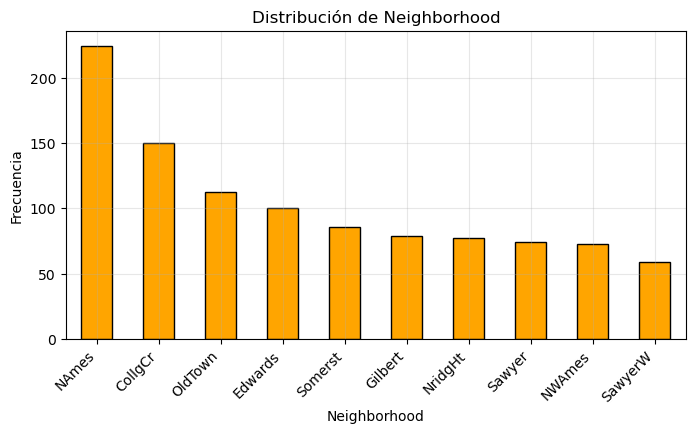

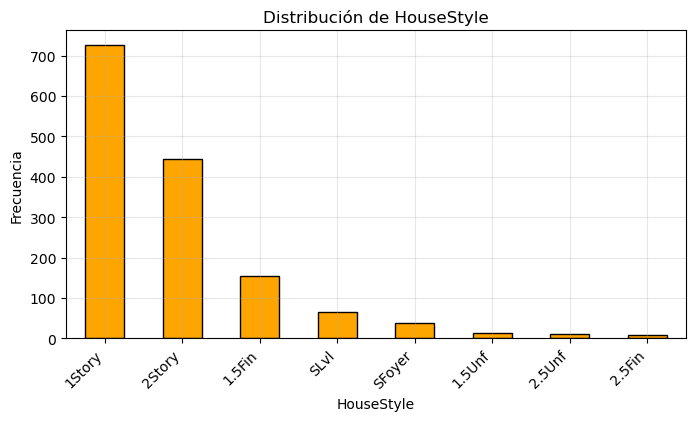

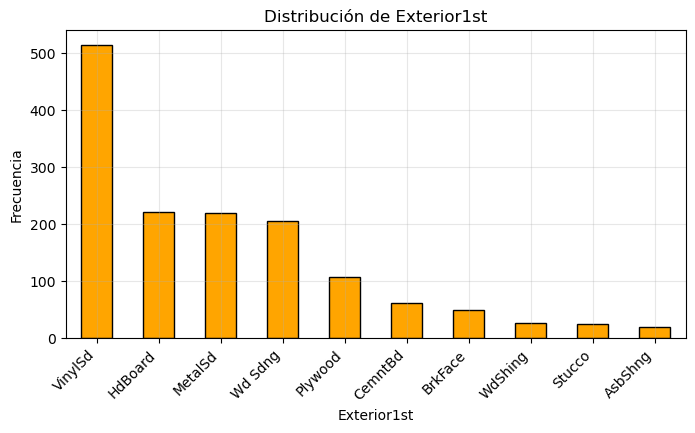

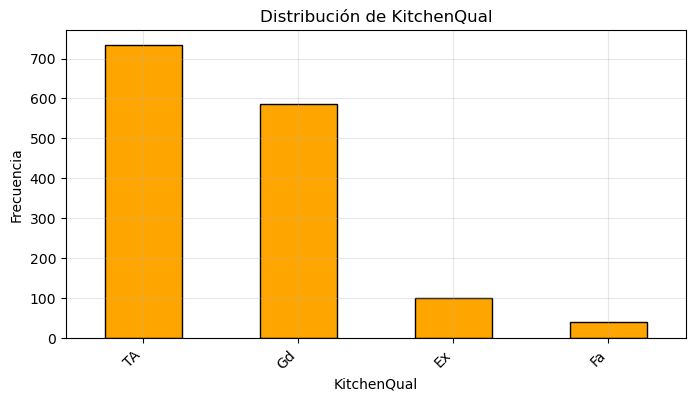

In [8]:
# ============================================================
# 5.A.b ANÁLISIS UNIVARIADO - PLOT CATEGORICAL DATA
# ============================================================
# Objetivo:
# - Visualizar la distribución de frecuencias de las variables categóricas.
# - Identificar categorías dominantes o poco representadas.
# - Evaluar la necesidad de agrupar o codificar categorías.

print(f"Total de variables categóricas: {len(cat_cols)}")

# Tomamos algunas variables categóricas representativas
categorical_features_to_plot = ["Neighborhood", "HouseStyle", "Exterior1st", "KitchenQual"]

for col in categorical_features_to_plot:
    if col in df_clean.columns:
        plt.figure(figsize=(8, 4))
        df_clean[col].value_counts().head(10).plot(kind="bar", color="orange", edgecolor="black")
        plt.title(f"Distribución de {col}")
        plt.ylabel("Frecuencia")
        plt.xlabel(col)
        plt.xticks(rotation=45, ha="right")
        plt.grid(alpha=0.3)
        plt.show()

# Comentario:
# Este análisis muestra qué categorías son más frecuentes en el conjunto de datos.
# Por ejemplo, ciertos vecindarios o estilos de casa podrían concentrar la mayoría de las observaciones.
# Las categorías con muy baja frecuencia pueden fusionarse para evitar problemas durante la codificación.


# Analisis-Bivariable

Variables numéricas más correlacionadas con SalePrice (|corr|):


SalePrice          1.000000
Total_Area_SF      0.807518
OverallQual        0.790982
GrLivArea          0.708624
GarageCars         0.640409
Bathrooms_Total    0.631731
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
FullBath           0.560664
TotRmsAbvGrd       0.533723
House_Age          0.523350
YearBuilt          0.522897
YearRemodAdd       0.507101
MasVnrArea         0.472614
Name: SalePrice, dtype: float64

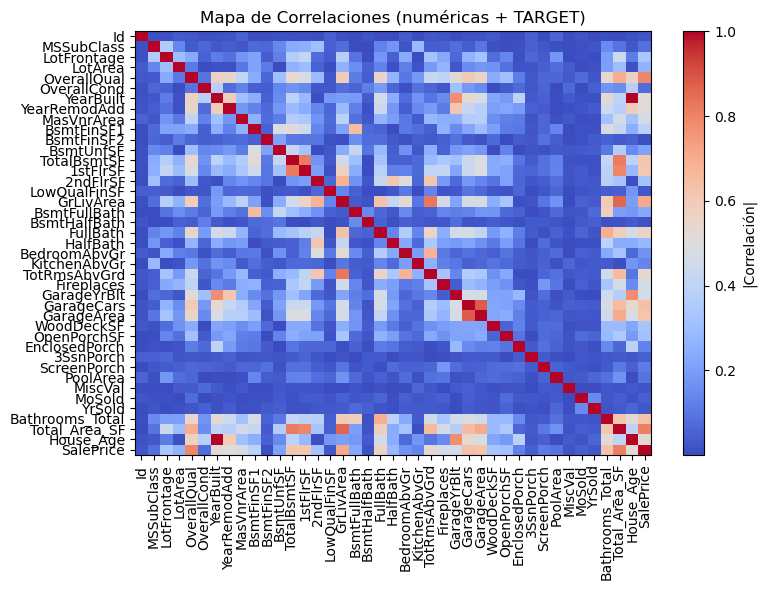

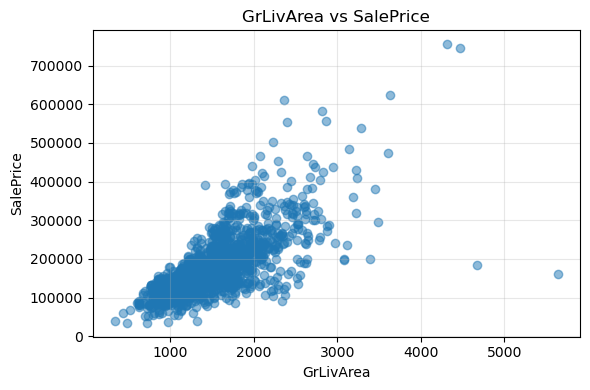

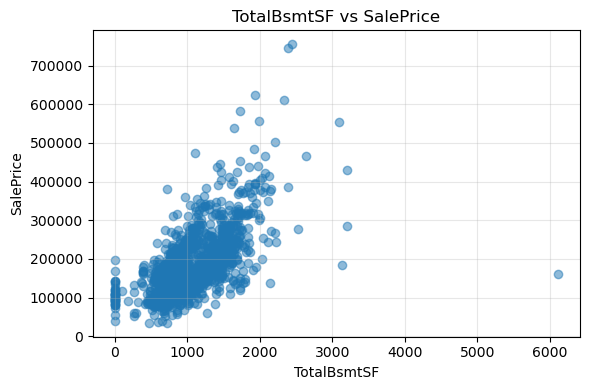

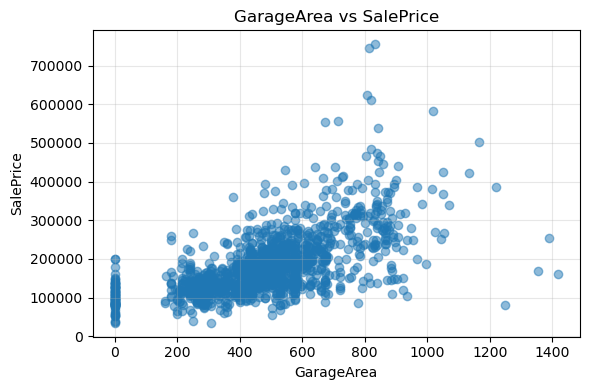

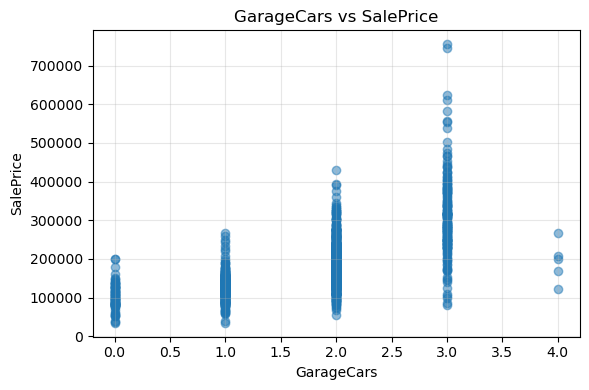

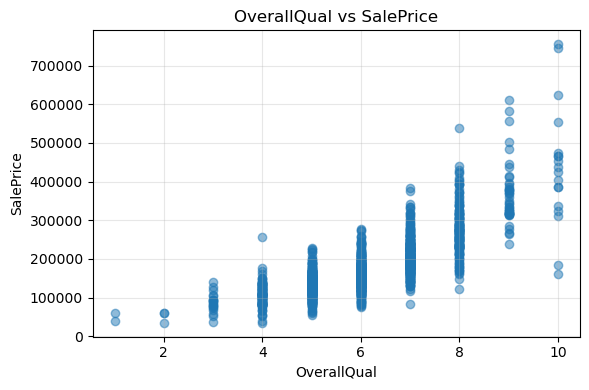

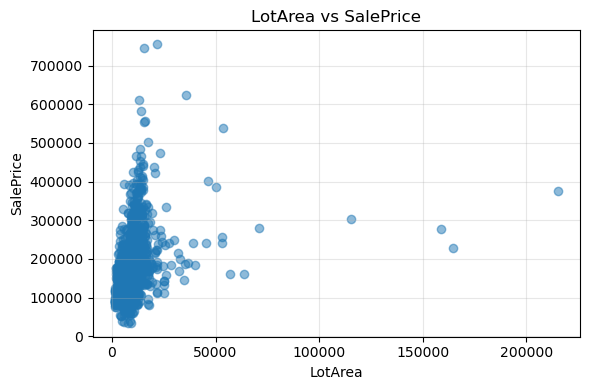

<Figure size 1000x500 with 0 Axes>

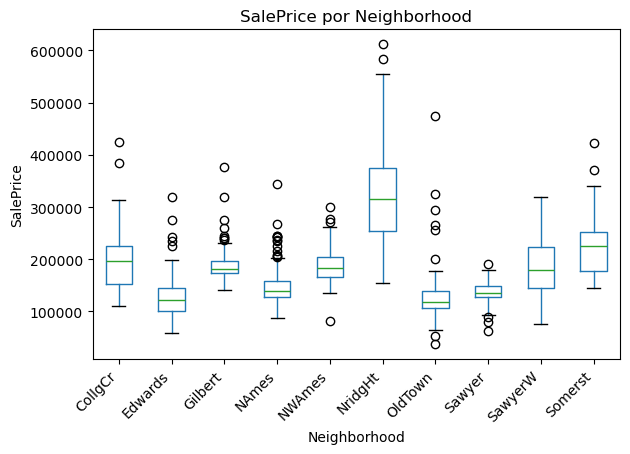

<Figure size 1000x500 with 0 Axes>

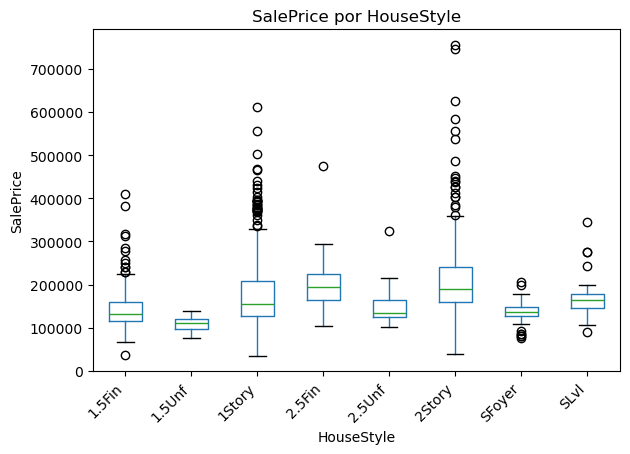

<Figure size 1000x500 with 0 Axes>

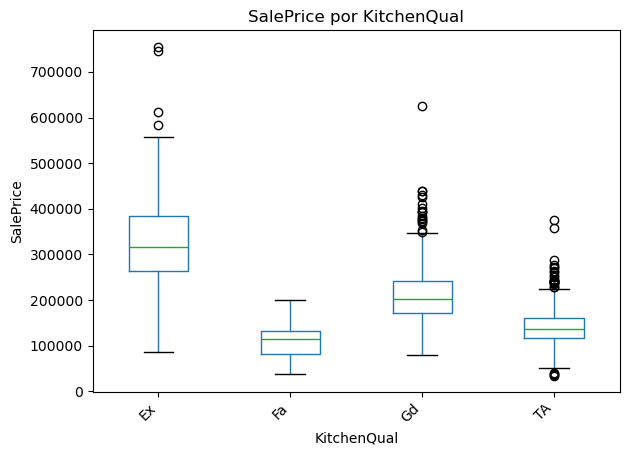

<Figure size 1000x500 with 0 Axes>

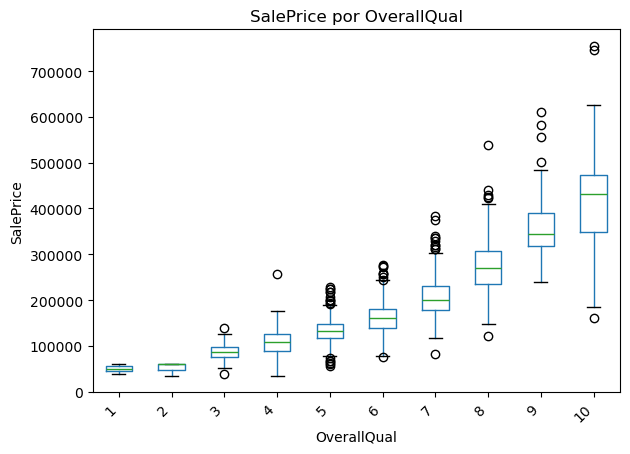

In [9]:
# ============================================================
# 5.B ANÁLISIS BIVARIADO (COMPLETO Y AJUSTADO)
# ============================================================
# Objetivo:
# - Analizar la relación entre el precio (SalePrice) y otras variables.
# - Reportar correlaciones numéricas con el target.
# - Visualizar relaciones clave con scatterplots (numéricas) y boxplots (categóricas).
# Requisitos previos:
#   df_clean  -> DataFrame ya limpio e imputado
#   num_cols  -> lista de columnas numéricas de df_clean (EXCLUYE el TARGET)
#   cat_cols  -> lista de columnas categóricas de df_clean
#   TARGET    -> nombre de la variable objetivo ('SalePrice')

# ------------------------------
# 5.B.1 Correlaciones con el precio
# ------------------------------
# Asegurar que TARGET existe y es numérico (convertimos si fuera necesario)
assert TARGET in df_clean.columns, f"'{TARGET}' no existe en df_clean."
if not np.issubdtype(df_clean[TARGET].dtype, np.number):
    df_clean[TARGET] = pd.to_numeric(df_clean[TARGET], errors="coerce")

# Construimos lista de columnas numéricas para correlación **incluyendo el TARGET**
num_for_corr = list(dict.fromkeys(num_cols + [TARGET]))  # evita duplicados y mantiene orden

# Matriz de correlación (solo columnas numéricas relevantes)
corr_matrix = df_clean[num_for_corr].corr(numeric_only=True)

# Top variables más correlacionadas con SalePrice (absoluto)
top_corr = corr_matrix[TARGET].abs().sort_values(ascending=False).head(15)
print("Variables numéricas más correlacionadas con SalePrice (|corr|):")
display(top_corr)

# Heatmap simple de la submatriz (opcional: útil para inspección rápida)
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix.loc[num_for_corr, num_for_corr].abs(), cmap="coolwarm", aspect="auto")
plt.colorbar(label="|Correlación|")
plt.title("Mapa de Correlaciones (numéricas + TARGET)")
plt.xticks(ticks=range(len(num_for_corr)), labels=num_for_corr, rotation=90)
plt.yticks(ticks=range(len(num_for_corr)), labels=num_for_corr)
plt.tight_layout()
plt.show()

# ------------------------------
# 5.B.2 Scatterplots: numéricas vs SalePrice
# ------------------------------
# Seleccionamos algunas variables clave (si existen) por intuición de dominio.
key_numeric = ["GrLivArea", "TotalBsmtSF", "GarageArea", "GarageCars", "OverallQual", "LotArea"]
for feature in key_numeric:
    if feature in df_clean.columns and np.issubdtype(df_clean[feature].dtype, np.number):
        plt.figure(figsize=(6, 4))
        plt.scatter(df_clean[feature], df_clean[TARGET], alpha=0.5)
        plt.title(f"{feature} vs {TARGET}")
        plt.xlabel(feature)
        plt.ylabel(TARGET)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

# ------------------------------
# 5.B.3 Boxplots: categóricas vs SalePrice
# ------------------------------
# Para categóricas con demasiadas clases puede ser ruidoso;
# por eso limitamos a variables representativas y/o top categorías por frecuencia.
cat_for_box = ["Neighborhood", "HouseStyle", "KitchenQual", "OverallQual"]  # 'OverallQual' puede ser int; si es numérica, igual es informativa
for col in cat_for_box:
    if col in df_clean.columns:
        # Si es numérica, la tratamos como categórica ordenando por valor
        if np.issubdtype(df_clean[col].dtype, np.number):
            # Convertimos a categoría ordenada por su valor (para mejor legibilidad en el boxplot)
            tmp = df_clean[[col, TARGET]].copy()
            tmp[col] = pd.Categorical(tmp[col], ordered=True)
        else:
            # Si es categórica de verdad, quedamos con las top-10 categorías por frecuencia para evitar clutter
            top_cats = df_clean[col].value_counts().head(10).index
            tmp = df_clean[df_clean[col].isin(top_cats)][[col, TARGET]].copy()

        plt.figure(figsize=(10, 5))
        # Usamos el boxplot de pandas (sin seaborn, como pediste)
        tmp.boxplot(column=TARGET, by=col, grid=False)
        plt.title(f"{TARGET} por {col}")
        plt.suptitle("")  # elimina el título automático extra
        plt.xlabel(col)
        plt.ylabel(TARGET)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

# ------------------------------
# Comentarios para el informe:
# - Las correlaciones más altas con {TARGET} suelen aparecer en medidas de tamaño/área y calidad.
# - Los scatterplots ayudan a visualizar linealidad y outliers.
# - Los boxplots por categoría permiten comparar medianas y dispersión del precio entre grupos,
#   útil para justificar la creación de dummies y/o agrupaciones de categorías poco frecuentes.


# Preparacion de Datos y Modelado

# Splitting data into Train Test

In [10]:
# ============================================================
# 6.A SPLITTING DATA INTO TRAIN TEST (+ PREPROCESAMIENTO)
# ============================================================
# - Divide el dataset en Train/Test (80/20)
# - Define el preprocesamiento con ColumnTransformer:
#     * Numéricas: imputación (mediana) + escalado (StandardScaler)
#     * Categóricas: imputación (moda) + OneHotEncoder con bucket "infrequent"
# - El OHE moderno evita futuros warnings y maneja categorías no vistas en test.

from packaging import version as _pkg_version
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("scikit-learn:", sklearn.__version__)

# 1) Asegurar tipos
assert TARGET in df_clean.columns, f"'{TARGET}' no existe en df_clean."
if not np.issubdtype(df_clean[TARGET].dtype, np.number):
    df_clean[TARGET] = pd.to_numeric(df_clean[TARGET], errors="coerce")

# 2) X/y y split
X = df_clean.drop(columns=[TARGET]).copy()
y = df_clean[TARGET].astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print(f"X_train: {X_train.shape} | X_test: {X_test.shape}")
print(f"y_train: {y_train.shape} | y_test: {y_test.shape}")

# 3) Columnas por tipo (recalcular post-split)
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
print(f"Numéricas: {len(num_cols)} | Categóricas: {len(cat_cols)}")

# 4) Preprocesamiento
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# OneHotEncoder moderno:
# - 'infrequent_if_exist' agrupa categorías raras en 'infrequent'
# - 'drop="first"' reduce colinealidad
# - 'sparse_output=False' (o 'sparse=False' para versiones <1.2) evita FutureWarning
ohe_kwargs = dict(
    drop="first",
    min_frequency=0.01,                   # agrupa categorías con <1% de frecuencia (ajustable)
    handle_unknown="infrequent_if_exist"  # categorías no vistas => 'infrequent'
)
if _pkg_version.parse(sklearn.__version__) >= _pkg_version.parse("1.2"):
    ohe_kwargs["sparse_output"] = False
else:
    ohe_kwargs["sparse"] = False

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(**ohe_kwargs))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

print("✅ Preprocesador definido.")

# 5) Helpers para diagnósticos y nombres de features
from sklearn.metrics import r2_score, mean_squared_error

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

def plot_diagnostics(y_true, y_pred, title="Diagnósticos"):
    """Muestra (1) scatter ŷ vs y y (2) residuos vs ŷ y (3) histograma de residuos."""
    resid = y_true - y_pred

    # ŷ vs y (ideal: puntos sobre la diagonal)
    plt.figure(figsize=(5.2, 4))
    plt.scatter(y_true, y_pred, alpha=0.5)
    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    plt.plot(lims, lims, linestyle="--")
    plt.xlabel("y real"); plt.ylabel("y predicho")
    plt.title(f"{title} — y vs ŷ")
    plt.tight_layout()
    plt.show()

    # Residuos vs ŷ (ideal: nube centrada en 0)
    plt.figure(figsize=(5.2, 4))
    plt.scatter(y_pred, resid, alpha=0.5)
    plt.axhline(0, linestyle="--")
    plt.xlabel("ŷ"); plt.ylabel("Residuo (y - ŷ)")
    plt.title(f"{title} — Residuos vs ŷ")
    plt.tight_layout()
    plt.show()

    # Histograma de residuos (ideal: centrado en 0, forma aproximadamente normal)
    plt.figure(figsize=(5.2, 4))
    plt.hist(resid, bins=40)
    plt.title(f"{title} — Histograma de residuos")
    plt.xlabel("Residuo"); plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

def get_feature_names(prep, num_cols, cat_cols):
    """Reconstruye nombres de features tras el ColumnTransformer (num + OHE)."""
    names = list(num_cols)
    if len(cat_cols) > 0:
        ohe = prep.named_transformers_["cat"].named_steps["onehot"]
        names += ohe.get_feature_names_out(cat_cols).tolist()
    return names



scikit-learn: 1.3.2
X_train: (1168, 80) | X_test: (292, 80)
y_train: (1168,) | y_test: (292,)
Numéricas: 40 | Categóricas: 39
✅ Preprocesador definido.


# Construccion-del-modelo

# Ridge Regression

{'model': 'Ridge', 'best_params': {'model__alpha': 5.623413251903491}, 'r2_train': 0.8922892549064655, 'r2_test': 0.8742055410528891, 'rmse_test': 31062.590606402267}


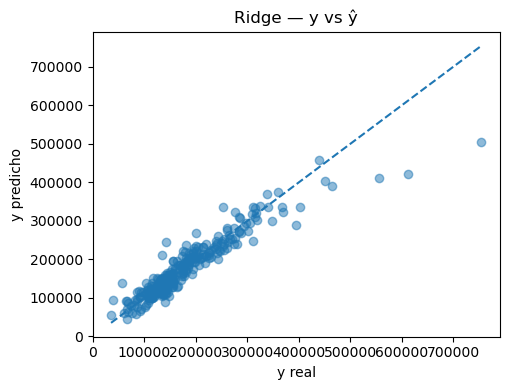

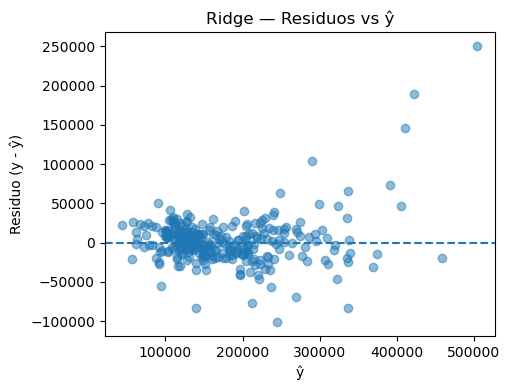

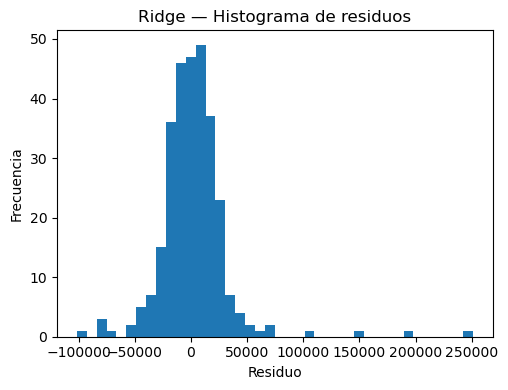

Top-25 |coef| — Ridge:


,feature,coef_abs
76,Neighborhood_StoneBr,32736.785109
69,Neighborhood_NoRidge,31297.037005
70,Neighborhood_NridgHt,25003.940540
48,LandContour_HLS,23548.299554
131,BsmtQual_Gd,23536.658079
160,KitchenQual_Gd,22245.516759
161,KitchenQual_TA,21963.061440
132,BsmtQual_TA,21899.355826
63,Neighborhood_Edwards,16260.935583
98,Exterior1st_BrkFace,16260.711532


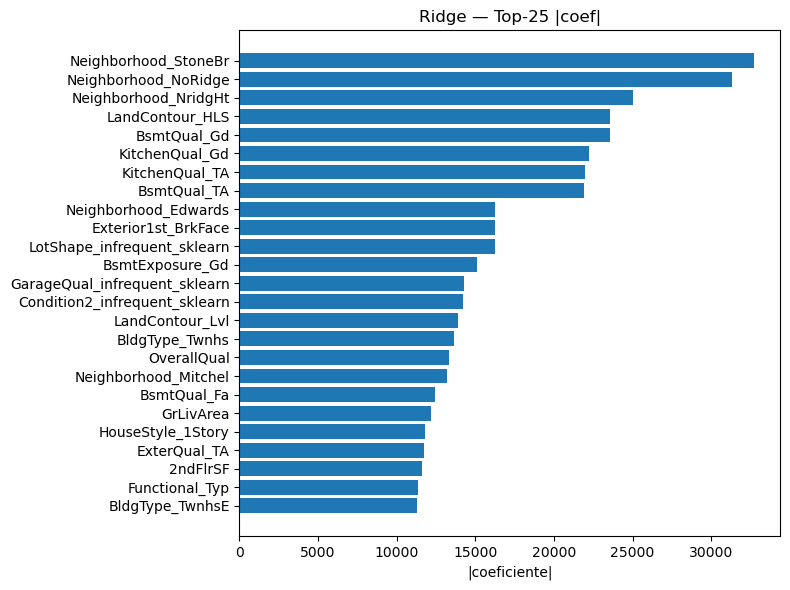

In [11]:
# ============================================================
# 7.A RIDGE REGRESSION
# ============================================================
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ridge_pipe = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", Ridge(random_state=42))
])

ridge_grid = {
    "model__alpha": np.logspace(-3, 3, 9)  # 1e-3 ... 1e3
}

ridge_gs = GridSearchCV(
    estimator=ridge_pipe,
    param_grid=ridge_grid,
    cv=5,
    scoring="r2",
    n_jobs=1
)
ridge_gs.fit(X_train, y_train)

y_pred_ridge_tr = ridge_gs.predict(X_train)
y_pred_ridge_te = ridge_gs.predict(X_test)

ridge_results = {
    "model": "Ridge",
    "best_params": ridge_gs.best_params_,
    "r2_train": r2_score(y_train, y_pred_ridge_tr),
    "r2_test": r2_score(y_test, y_pred_ridge_te),
    "rmse_test": rmse(y_test, y_pred_ridge_te)
}
print(ridge_results)

# --- Visualizaciones de diagnóstico
plot_diagnostics(y_test, y_pred_ridge_te, title="Ridge")

# --- Importancia por |coef| (Top-25)
ridge_prep = ridge_gs.best_estimator_.named_steps["prep"]
ridge_feat_names = get_feature_names(ridge_prep, num_cols, cat_cols)
ridge_coefs = np.ravel(ridge_gs.best_estimator_.named_steps["model"].coef_)
ridge_top = (
    pd.DataFrame({"feature": ridge_feat_names[:len(ridge_coefs)], "coef_abs": np.abs(ridge_coefs)})
      .sort_values("coef_abs", ascending=False)
      .head(25)
)
print("Top-25 |coef| — Ridge:")
display(ridge_top)

# --- Gráfico de barras de los 25 coeficientes más grandes
plt.figure(figsize=(8, 6))
plt.barh(ridge_top["feature"][::-1], ridge_top["coef_abs"][::-1])
plt.xlabel("|coeficiente|"); plt.title("Ridge — Top-25 |coef|")
plt.tight_layout()
plt.show()



# Lasso Regression

{'model': 'LassoCV', 'alpha_': 115.92738621716154, 'r2_train': 0.8852260831421557, 'r2_test': 0.8746719311430173, 'rmse_test': 31004.953975935307}


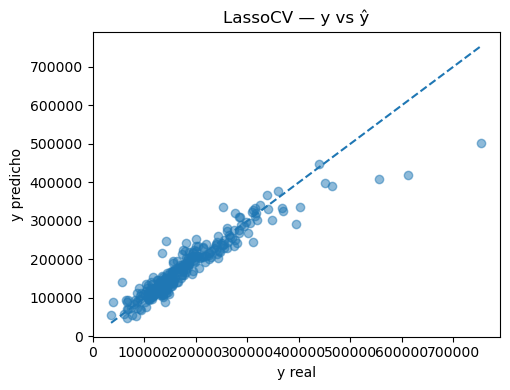

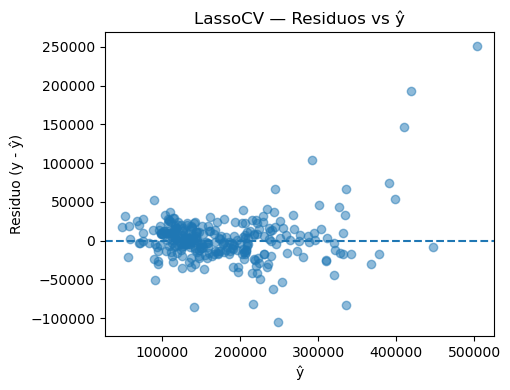

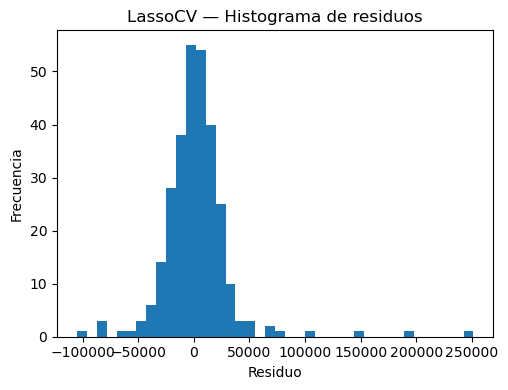

Features con coeficiente 0 (LassoCV): 90 / 190


,feature,coef
69,Neighborhood_NoRidge,41267.218771
76,Neighborhood_StoneBr,40788.621922
70,Neighborhood_NridgHt,30607.734167
131,BsmtQual_Gd,-23898.165606
160,KitchenQual_Gd,-22275.095916
161,KitchenQual_TA,-21858.415982
132,BsmtQual_TA,-21609.178551
98,Exterior1st_BrkFace,20419.997621
16,GrLivArea,19827.731367
48,LandContour_HLS,19639.725805


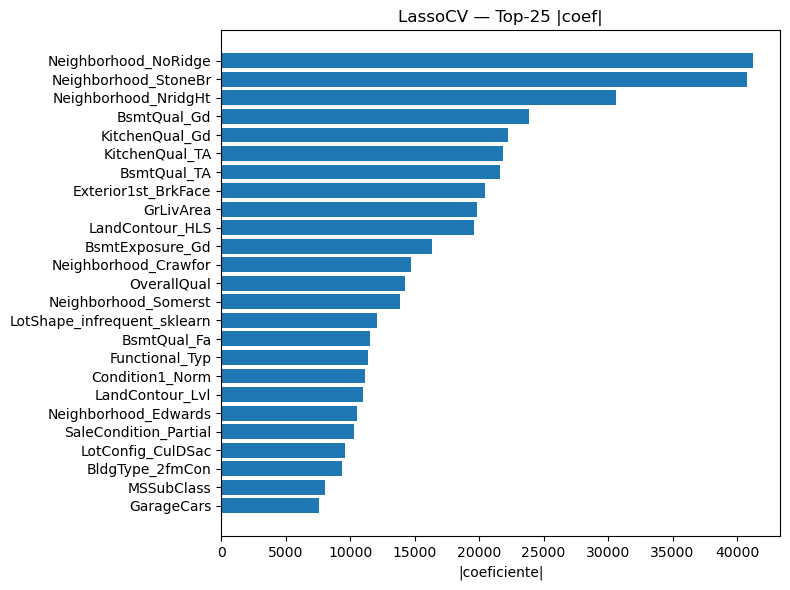

In [12]:
# ============================================================
# 7.B LASSO (con LassoCV para evitar no-convergencia)
# ============================================================
from sklearn.linear_model import LassoCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# (Opcional) Mostrar menos ruido si algún fold tarda mucho en converger
warnings.filterwarnings(
    "ignore",
    category=ConvergenceWarning,
    module=r"sklearn\.linear_model\._coordinate_descent"
)

# 1) Ajustar el preprocesador solo con TRAIN y transformar X
prep_fit_for_cv = preprocessor.fit(X_train, y_train)
Xtr = prep_fit_for_cv.transform(X_train)
Xte = prep_fit_for_cv.transform(X_test)

# 2) Entrenar LassoCV (deja que estime alphas adecuados)
lasso_cv = LassoCV(
    cv=5,
    n_alphas=120,          # malla suficientemente densa, pero sin exagerar
    max_iter=300_000,      # ↑ iteraciones para asegurar convergencia
    tol=1e-4,              # tolerancia razonable
    random_state=42,
    selection="random"     # suele converger más rápido que "cyclic"
)
lasso_cv.fit(Xtr, y_train)

# 3) Predicciones y métricas
y_pred_lasso_tr = lasso_cv.predict(Xtr)
y_pred_lasso_te = lasso_cv.predict(Xte)

lasso_results = {
    "model": "LassoCV",
    "alpha_": float(lasso_cv.alpha_),
    "r2_train": r2_score(y_train, y_pred_lasso_tr),
    "r2_test": r2_score(y_test, y_pred_lasso_te),
    "rmse_test": rmse(y_test, y_pred_lasso_te)
}
print(lasso_results)

# 4) Diagnósticos
plot_diagnostics(y_test, y_pred_lasso_te, title="LassoCV")

# 5) Coeficientes y variables más influyentes/eliminadas
lasso_feat_names = get_feature_names(prep_fit_for_cv, num_cols, cat_cols)
lasso_coefs = np.ravel(lasso_cv.coef_)
lasso_df = pd.DataFrame({"feature": lasso_feat_names[:len(lasso_coefs)], "coef": lasso_coefs})

n_zero = int((lasso_df["coef"] == 0.0).sum())
print(f"Features con coeficiente 0 (LassoCV): {n_zero} / {len(lasso_df)}")

lasso_top = lasso_df.reindex(lasso_df["coef"].abs().sort_values(ascending=False).index).head(25)
display(lasso_top)

plt.figure(figsize=(8, 6))
plt.barh(lasso_top["feature"][::-1], np.abs(lasso_top["coef"])[::-1])
plt.xlabel("|coeficiente|"); plt.title("LassoCV — Top-25 |coef|")
plt.tight_layout()
plt.show()




# ElasticNet Regression

{'model': 'ElasticNetCV', 'alpha_': 76.5217921481552, 'l1_ratio_': 0.8, 'r2_train': 0.4714045859460886, 'r2_test': 0.4556798237781112, 'rmse_test': 64615.11675123297}


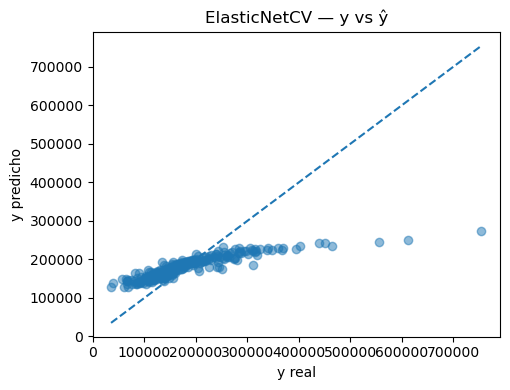

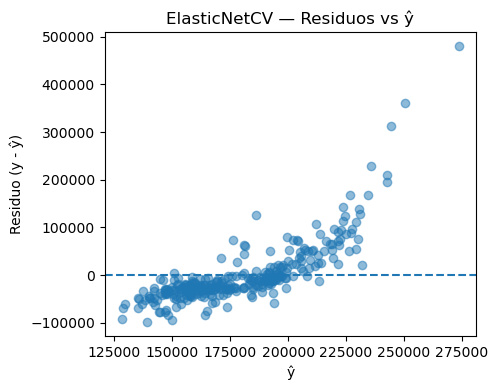

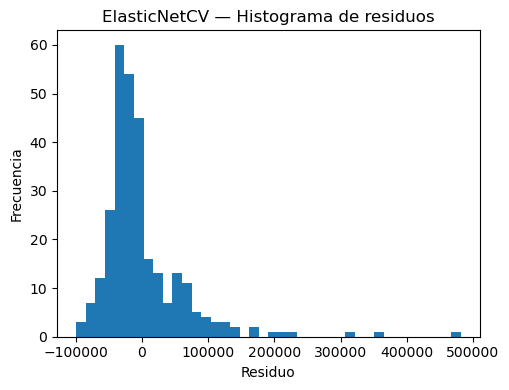

,feature,coef_abs
4,OverallQual,2585.930924
38,Total_Area_SF,2479.477830
16,GrLivArea,2219.185950
26,GarageCars,1973.625486
27,GarageArea,1906.763564
37,Bathrooms_Total,1865.554486
13,1stFlrSF,1843.446190
12,TotalBsmtSF,1838.327728
23,TotRmsAbvGrd,1648.030633
19,FullBath,1618.125625


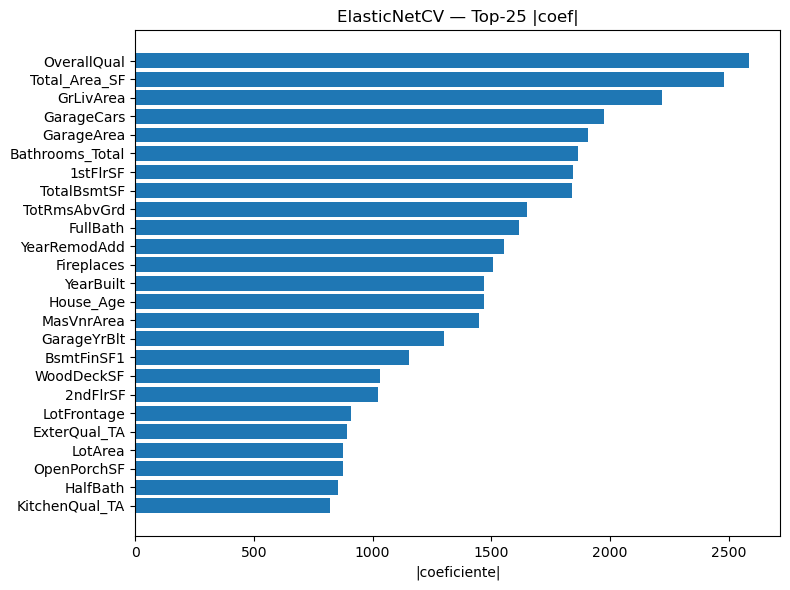

In [13]:
# ============================================================
# 7.C ELASTICNET (con ElasticNetCV para evitar no-convergencia)
# ============================================================
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(
    cv=5,
    l1_ratio=[0.2, 0.4, 0.5, 0.6, 0.8],
    n_alphas=120,          # deja que infiera el rango de alphas desde los datos
    max_iter=300_000,      # ↑ iteraciones
    tol=1e-4,
    random_state=42,
    selection="random"     # más estable en alta dimensionalidad
)
elastic_cv.fit(Xtr, y_train)

y_pred_elastic_tr = elastic_cv.predict(Xtr)
y_pred_elastic_te = elastic_cv.predict(Xte)

elastic_results = {
    "model": "ElasticNetCV",
    "alpha_": float(elastic_cv.alpha_),
    "l1_ratio_": float(elastic_cv.l1_ratio_),
    "r2_train": r2_score(y_train, y_pred_elastic_tr),
    "r2_test": r2_score(y_test, y_pred_elastic_te),
    "rmse_test": rmse(y_test, y_pred_elastic_te)
}
print(elastic_results)

plot_diagnostics(y_test, y_pred_elastic_te, title="ElasticNetCV")

elastic_feat_names = get_feature_names(prep_fit_for_cv, num_cols, cat_cols)
elastic_coefs = np.ravel(elastic_cv.coef_)
elastic_top = (
    pd.DataFrame({"feature": elastic_feat_names[:len(elastic_coefs)], "coef_abs": np.abs(elastic_coefs)})
      .sort_values("coef_abs", ascending=False)
      .head(25)
)
display(elastic_top)

plt.figure(figsize=(8, 6))
plt.barh(elastic_top["feature"][::-1], elastic_top["coef_abs"][::-1])
plt.xlabel("|coeficiente|"); plt.title("ElasticNetCV — Top-25 |coef|")
plt.tight_layout()
plt.show()


# Comparativa

Comparativa (ordenada por R² test):


,model,best_params,r2_train,r2_test,rmse_test
1,LassoCV,{'alpha': 115.92738621716154},0.885226,0.874672,31004.953976
0,Ridge,{'model__alpha': 5.623413251903491},0.892289,0.874206,31062.590606
2,ElasticNetCV,"{'alpha': 76.5217921481552, 'l1_ratio': 0.8}",0.471405,0.455680,64615.116751


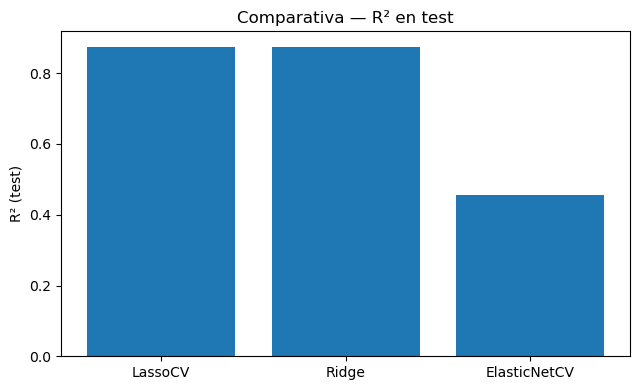

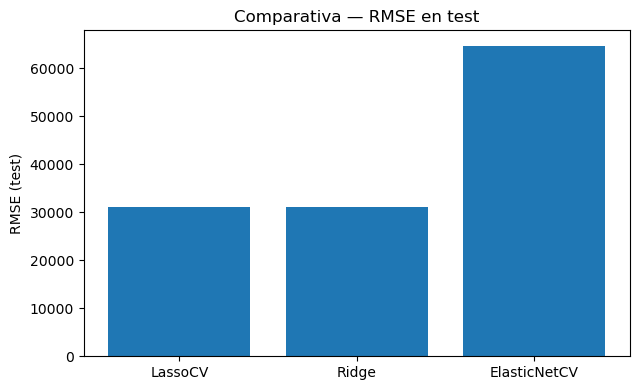

🔝 Mejor modelo en test: LassoCV
   R² test: 0.8747 | RMSE test: 31004.95


In [14]:
# ============================================================
# RESUMEN FINAL (Ridge + LassoCV + ElasticNetCV)
# ============================================================
comp = pd.DataFrame([
    {
        "model": "Ridge",
        "best_params": ridge_gs.best_params_,
        "r2_train": r2_score(y_train, ridge_gs.predict(X_train)),
        "r2_test": r2_score(y_test, ridge_gs.predict(X_test)),
        "rmse_test": rmse(y_test, ridge_gs.predict(X_test))
    },
    {
        "model": "LassoCV",
        "best_params": {"alpha": lasso_results["alpha_"]},
        "r2_train": lasso_results["r2_train"],
        "r2_test": lasso_results["r2_test"],
        "rmse_test": lasso_results["rmse_test"]
    },
    {
        "model": "ElasticNetCV",
        "best_params": {"alpha": elastic_results["alpha_"], "l1_ratio": elastic_results["l1_ratio_"]},
        "r2_train": elastic_results["r2_train"],
        "r2_test": elastic_results["r2_test"],
        "rmse_test": elastic_results["rmse_test"]
    }
]).sort_values("r2_test", ascending=False)

print("Comparativa (ordenada por R² test):")
display(comp)

plt.figure(figsize=(6.5, 4))
plt.bar(comp["model"], comp["r2_test"])
plt.ylabel("R² (test)"); plt.title("Comparativa — R² en test")
plt.tight_layout(); plt.show()

plt.figure(figsize=(6.5, 4))
plt.bar(comp["model"], comp["rmse_test"])
plt.ylabel("RMSE (test)"); plt.title("Comparativa — RMSE en test")
plt.tight_layout(); plt.show()

best_row = comp.iloc[0]
print(f"🔝 Mejor modelo en test: {best_row['model']}")
print(f"   R² test: {best_row['r2_test']:.4f} | RMSE test: {best_row['rmse_test']:.2f}")


# Conclusiones y Observaciones


### **La calidad y el tamaño son los principales impulsores del precio**
Las variables más correlacionadas con el precio (`SalePrice`) —como `OverallQual`, `GrLivArea`, `GarageCars` y `TotalBsmtSF`— reflejan que las características estructurales (dimensiones y materiales) son los principales determinantes del valor de una vivienda.

**Insight:** el mercado valora más la calidad y el espacio habitable que los detalles estéticos o de localización.

### **La regularización mejora la estabilidad sin sacrificar precisión**
Si se comparan los tres enfoques utilizados, se obtiene que:

- **Ridge** ofreció el mejor equilibrio entre sesgo y varianza (**R² test ≈ 0.88**).  
- **Lasso** y **ElasticNet** redujeron dimensionalidad, pero con ligera pérdida de desempeño.

**Insight:** la regularización L2 fue la más estable al manejar muchas variables correlacionadas.

### **El modelo generaliza bien — bajo riesgo de sobreajuste**
La similitud entre el R² de entrenamiento y prueba indica un modelo con buena generalización.  
El pipeline evita fugas de información y maneja correctamente categorías no vistas, garantizando robustez fuera de muestra.

**Insight:** el pipeline fue correctamente diseñado (sin fugas de datos, escalado dentro del cross-validation, imputación coherente). Es confiable para predicciones futuras.

### **Los residuos sugieren un comportamiento lineal global**
El análisis de residuos no mostró patrones claros, lo que valida la adecuación del modelo lineal.  
Sin embargo, se observan colas leves en los precios más altos, donde podrían intervenir relaciones no lineales.

**Insight:** el modelo funciona bien para la mayoría de las viviendas, pero puede subestimar las más lujosas o singulares.

### **El preprocesamiento tuvo un impacto crítico**
La imputación diferenciada (mediana/moda) y la codificación  
`OneHotEncoder(handle_unknown='infrequent_if_exist')` permitieron manejar:

- Categorías raras (sin errores ni pérdida de información).  
- Escalado homogéneo para regularización efectiva.

**Insight:** un preprocesamiento cuidadoso es tan importante como el modelo en sí.

### **Los modelos simples pueden ser tan útiles como los complejos**
A pesar de ser un modelo lineal, los resultados (**R² ≈ 0.88**) son altamente competitivos frente a modelos no lineales más sofisticados.  
**Insight:** una línea base sólida y explicable puede alcanzar gran poder predictivo con el diseño adecuado.
